## Modeling

### 导入依赖库

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm    # 用于线性回归建模
import matplotlib.pyplot as plt
import os

# 设置中文字体（避免可视化时中文乱码）
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
plt.rcParams['axes.unicode_minus'] = False

### 读取房价数据

In [7]:
# 获取当前 Jupyter Lab 所在目录
current_dir = os.getcwd()  

# 定义房价数据的文件名（仅房价文件）
price_file_names = [
    "Qinghe_house_price_cleaned.csv",
    "Shangdi_house_price_cleaned.csv",
    "Xierqi_house_price_cleaned.csv",
    "Xisanqi_house_price_cleaned.csv"
]

# 拼接“当前目录 + 房价文件名”得到完整路径
price_file_paths = [os.path.join(current_dir, name) for name in price_file_names]

# 批量读取并合并所有房价 CSV 文件
price_df = pd.concat([pd.read_csv(path) for path in price_file_paths], ignore_index=True)

# 查看房价数据前 5 行，确认格式
print("房价数据前 5 行：")
price_df.head()

房价数据前 5 行：


,m2,price,location,data_type,price_per_m2
0,125.54,1265.0,Qinghe,house_price,10.076470
1,166.00,1195.0,Qinghe,house_price,7.198795
2,180.00,1450.0,Qinghe,house_price,8.055556
3,97.68,1098.0,Qinghe,house_price,11.240786
4,237.70,2800.0,Qinghe,house_price,11.779554


### 读取租金数据

In [23]:
# 定义租金数据的文件名（仅租金文件）
rent_file_names = [
    "Qinghe_house_rent_cleaned.csv",
    "Shangdi_house_rent_cleaned.csv",
    "Xierqi_house_rent_cleaned.csv",
    "Xisanqi_house_rent_cleaned.csv"
]

# 拼接“当前目录 + 租金文件名”得到完整路径
rent_file_paths = [os.path.join(current_dir, name) for name in rent_file_names]

# 批量读取并合并所有租金 CSV 文件
rent_df = pd.concat([pd.read_csv(path) for path in rent_file_paths], ignore_index=True)

# 查看租金数据前 5 行，确认格式
print("租金数据前 5 行：")
rent_df.head()

租金数据前 5 行：


,m2,price,location,data_type,rent_per_m2
0,12.0,1700.0,Qinghe,house_rent,141.666667
1,85.0,6600.0,Qinghe,house_rent,77.647059
2,15.0,2350.0,Qinghe,house_rent,156.666667
3,40.0,5000.0,Qinghe,house_rent,125.000000
4,18.0,2000.0,Qinghe,house_rent,111.111111


### 房价数据 → 独热编码 + Model 1（预测每平米房价）

In [13]:
# 对房价数据的“location（街区）”做独热编码（drop_first=True 避免虚拟变量陷阱）
price_location_dummies = pd.get_dummies(price_df['location'], drop_first=True)

# 合并独热编码后的列与房价数据
price_df_with_dummies = pd.concat([price_df, price_location_dummies], axis=1)

# 布尔型转数值型
for col in price_location_dummies.columns:
    price_df_with_dummies[col] = price_df_with_dummies[col].astype(int)  # bool → int（True→1，False→0）

# 定义 Model 1 的自变量（X_price）和因变量（y_price）
X_price = price_df_with_dummies[['m2'] + price_location_dummies.columns.tolist()]    # 自变量：面积 + 街区独热编码
y_price = price_df_with_dummies['price_per_m2']    # 因变量：每平米房价

# 为线性回归添加常数项（statsmodels 要求显式指定截距项）
X_price = sm.add_constant(X_price)

# 初始化并拟合 OLS 线性回归模型
model_price = sm.OLS(y_price, X_price)
results_price = model_price.fit()

# 打印 Model 1 的详细回归结果
print("Model 1（预测每平米房价）的回归结果：")
print(results_price.summary())

Model 1（预测每平米房价）的回归结果：
                            OLS Regression Results                            
Dep. Variable:           price_per_m2   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     734.1
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        19:26:16   Log-Likelihood:                -8848.5
No. Observations:                4018   AIC:                         1.771e+04
Df Residuals:                    4013   BIC:                         1.774e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0112      0.

In [15]:
# 对租金数据的“location（街区）”做独热编码（drop_first=True 避免虚拟变量陷阱）
rent_location_dummies = pd.get_dummies(rent_df['location'], drop_first=True)

# 合并独热编码后的列与租金数据
rent_df_with_dummies = pd.concat([rent_df, rent_location_dummies], axis=1)

# 布尔型转数值型
for col in price_location_dummies.columns:
    rent_df_with_dummies[col] = rent_df_with_dummies[col].astype(int)  # bool → int（True→1，False→0）

# 定义 Model 2 的自变量（X_rent）和因变量（y_rent）
X_rent = rent_df_with_dummies[['m2'] + rent_location_dummies.columns.tolist()]    # 自变量：面积 + 街区独热编码
y_rent = rent_df_with_dummies['rent_per_m2']    # 因变量：每平米租金

# 为线性回归添加常数项
X_rent = sm.add_constant(X_rent)

# 初始化并拟合 OLS 线性回归模型
model_rent = sm.OLS(y_rent, X_rent)
results_rent = model_rent.fit()

# 打印 Model 2 的详细回归结果
print("Model 2（预测每平米租金）的回归结果：")
print(results_rent.summary())

Model 2（预测每平米租金）的回归结果：
                            OLS Regression Results                            
Dep. Variable:            rent_per_m2   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     635.1
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        19:26:34   Log-Likelihood:                -15438.
No. Observations:                3322   AIC:                         3.089e+04
Df Residuals:                    3317   BIC:                         3.092e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.6676      1.

### 预测房价和租金计算租售比

#### 1. 准备全量数据的独热编码

In [65]:
# merged_df 是最开始合并的“所有房源数据”（含房价、租金）
full_location_dummies = pd.get_dummies(merged_df['location'], drop_first=True)
full_df_with_dummies = pd.concat([merged_df, full_location_dummies], axis=1)

#### 2. 用 Model 1 预测全量数据的 “每平米房价”

In [69]:
full_location_dummies = pd.get_dummies(merged_df['location'], drop_first=True)
full_df_with_dummies = pd.concat([merged_df, full_location_dummies], axis=1)
# 构造房价模型的自变量（和 Model 1 输入一致）
X_full_price = full_df_with_dummies[['m2'] + full_location_dummies.columns.tolist()]
X_full_price = sm.add_constant(X_full_price)    # 加常数项

# 预测房价
full_df_with_dummies['pred_price_per_m2'] = results_price.predict(X_full_price)

#### 3. 用Model 2 预测全量数据的 “每平米租金” 

In [80]:
# 构造租金模型的自变量（和 Model 2 输入一致）
X_full_rent = full_df_with_dummies[['m2'] + full_location_dummies.columns.tolist()]
X_full_rent = sm.add_constant(X_full_rent)    # 加常数项

# 预测租金
full_df_with_dummies['pred_rent_per_m2'] = results_rent.predict(X_full_rent)

#### 4.计算租售比

In [75]:
# 计算租售比：房价（万元/㎡）×10000 → 元/㎡，再 ÷ 租金（元/㎡/月）
full_df_with_dummies['price_to_rent_ratio'] = (full_df_with_dummies['pred_price_per_m2'] * 10000) / full_df_with_dummies['pred_rent_per_m2']

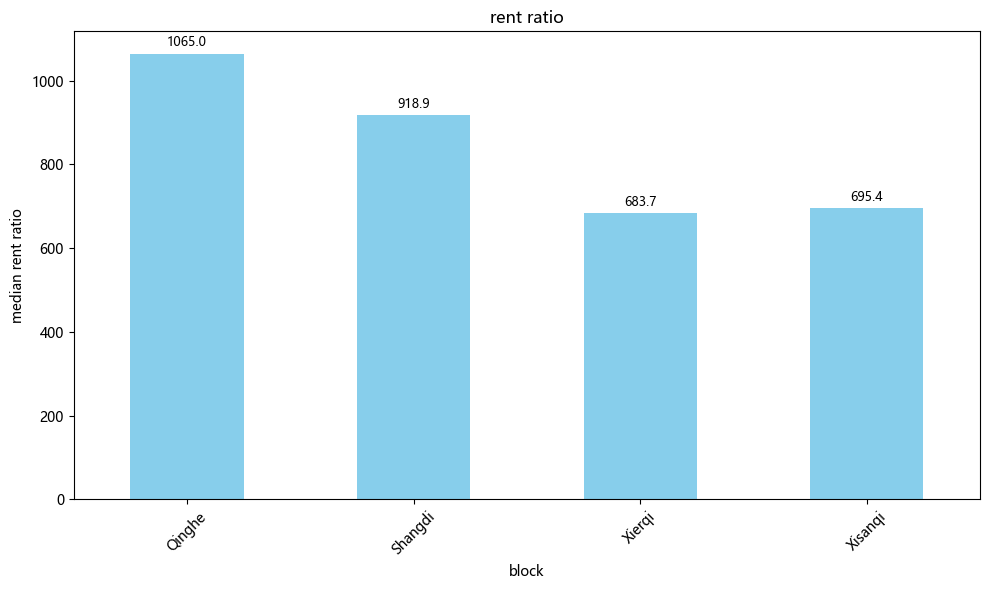

In [82]:
# 按“街区”分组，计算租售比的中位数
median_ratio = full_df_with_dummies.groupby('location')['price_to_rent_ratio'].median()

# 绘制柱状图
plt.figure(figsize=(10, 6))
# 绘制柱状图，同时获取图表对象（用于后续标注）
ax = median_ratio.plot(kind='bar', color='skyblue')

# 为每个柱状图标注“租售比中位值”
for i, median_val in enumerate(median_ratio):
    # 在柱子顶部标注数值，ha='center' 表示水平居中，va='bottom' 表示垂直靠下
    # f'{median_val:.1f}' 表示保留1位小数（可根据需要调整精度）
    ax.text(
        i, 
        median_val + 10,    # 数值垂直位置（+10 是为了让标注在柱子上方，避免重叠）
        f'{median_val:.1f}',  
        ha='center', 
        va='bottom',
        fontsize=9
    )

# 设置图表标题、坐标轴标签
plt.title('rent ratio')
plt.xlabel('block')
plt.ylabel('median rent ratio')    # 单位为“月”，表示“租金覆盖房价所需的月数”
plt.xticks(rotation=45)
plt.tight_layout()    # 自动调整布局，避免标签截断
plt.show()

## Modeling Pro Max

### 生成交互项

In [32]:
# 假设 price_location_dummies 是房价数据的街区独热编码（pd.get_dummies 结果）
print("房价数据的街区独热编码列：", price_location_dummies.columns.tolist())

房价数据的街区独热编码列： ['Shangdi', 'Xierqi', 'Xisanqi']


In [86]:
# 遍历每个街区独热编码列，生成交互项
for block_col in price_location_dummies.columns:
    interaction_col_name = f"m2_{block_col}"    # 交互项列名（如 m2_Shangdi）
    price_df_with_dummies[interaction_col_name] = price_df_with_dummies['m2'] * price_df_with_dummies[block_col]

# 查看生成的交互项
print("房价数据新增的交互项列：", 
      [col for col in price_df_with_dummies.columns if col.startswith("m2_")])

房价数据新增的交互项列： ['m2_Shangdi', 'm2_Xierqi', 'm2_Xisanqi']


In [36]:
# 假设 rent_location_dummies 是租金数据的街区独热编码
for block_col in rent_location_dummies.columns:
    interaction_col_name = f"m2_{block_col}"
    rent_df_with_dummies[interaction_col_name] = rent_df_with_dummies['m2'] * rent_df_with_dummies[block_col]

print("租金数据新增的交互项列：", 
      [col for col in rent_df_with_dummies.columns if col.startswith("m2_")])

租金数据新增的交互项列： ['m2_Shangdi', 'm2_Xierqi', 'm2_Xisanqi']


### 训练增强版模型

In [88]:
# 选择自变量列：面积、街区独热编码、所有“m2_街区”交互项
features_plus = (
    ['m2']  # 原始面积特征
    + price_location_dummies.columns.tolist()    # 原始街区独热编码
    + [col for col in price_df_with_dummies.columns if col.startswith("m2_")]    # 所有交互项
)

X_price_plus = price_df_with_dummies[features_plus]
X_price_plus = sm.add_constant(X_price_plus)    # 添加截距项（statsmodels 要求）

y_price = price_df_with_dummies['price_per_m2']    # 因变量：每平米房价

# 训练 Model 1+
model_price_plus = sm.OLS(y_price, X_price_plus)
results_price_plus = model_price_plus.fit()

# 查看 Model 1+ 的回归结果（重点关注 R² 变化）
print("Model 1+（含所有街区×面积交互项）的回归结果：")
print(results_price_plus.summary())

Model 1+（含所有街区×面积交互项）的回归结果：
                            OLS Regression Results                            
Dep. Variable:           price_per_m2   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     550.6
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        19:34:53   Log-Likelihood:                -8598.5
No. Observations:                4018   AIC:                         1.721e+04
Df Residuals:                    4010   BIC:                         1.726e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3136   

In [84]:
# 选择租金模型的自变量列
features_rent_plus = (
    ['m2'] 
    + rent_location_dummies.columns.tolist() 
    + [col for col in rent_df_with_dummies.columns if col.startswith("m2_")]
)

X_rent_plus = rent_df_with_dummies[features_rent_plus]
X_rent_plus = sm.add_constant(X_rent_plus)

y_rent = rent_df_with_dummies['rent_per_m2']    # 因变量：每平米租金

# 训练 Model 2+
model_rent_plus = sm.OLS(y_rent, X_rent_plus)
results_rent_plus = model_rent_plus.fit()

print("Model 2+（含所有街区×面积交互项）的回归结果：")
print(results_rent_plus.summary())

Model 2+（含所有街区×面积交互项）的回归结果：
                            OLS Regression Results                            
Dep. Variable:            rent_per_m2   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     394.8
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        19:34:09   Log-Likelihood:                -15375.
No. Observations:                3322   AIC:                         3.077e+04
Df Residuals:                    3314   BIC:                         3.081e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.9825   

### 预测房价和租金计算租售比

#### 1. 处理全量数据

In [49]:
# 生成街区独热编码（与训练时保持 drop_first=True 逻辑）
full_location_dummies = pd.get_dummies(merged_df['location'], drop_first=True)
merged_df_with_dummies = pd.concat([merged_df, full_location_dummies], axis=1)

# 生成所有“m2_街区”交互项
for block_col in full_location_dummies.columns:
    merged_df_with_dummies[f'm2_{block_col}'] = merged_df_with_dummies['m2'] * merged_df_with_dummies[block_col]

#### 2. 用 Model 1+ 预测全量数据的 “每平米房价”

In [52]:
# 构造房价模型的自变量（与 Model 1+ 输入特征一致）
features_price_plus = (
    ['m2'] 
    + price_location_dummies.columns.tolist()    # 原始街区独热编码列
    + [col for col in price_df_with_dummies.columns if col.startswith("m2_")]    # 所有“m2_街区”交互项
)
X_full_price = merged_df_with_dummies[features_price_plus]
X_full_price = sm.add_constant(X_full_price)    # 添加截距项（statsmodels 要求）

# 预测每平米房价
merged_df_with_dummies['pred_price_per_m2'] = results_price_plus.predict(X_full_price)

#### 3. 用 Model 2+ 预测全量数据的 “每平米租金”

In [58]:
# 构造租金模型的自变量（与 Model 2+ 输入特征一致）
features_rent_plus = (
    ['m2'] 
    + rent_location_dummies.columns.tolist()    # 原始街区独热编码列
    + [col for col in rent_df_with_dummies.columns if col.startswith("m2_")]    # 所有“m2_街区”交互项
)
X_full_rent = merged_df_with_dummies[features_rent_plus]
X_full_rent = sm.add_constant(X_full_rent)    # 添加截距项

# 预测每平米租金
merged_df_with_dummies['pred_rent_per_m2'] = results_rent_plus.predict(X_full_rent)

#### 4，计算租售比

In [61]:
# 计算租售比（单位转换：房价从“万元”转“元”）
merged_df_with_dummies['price_to_rent_ratio'] = (merged_df_with_dummies['pred_price_per_m2'] * 10000) / merged_df_with_dummies['pred_rent_per_m2']

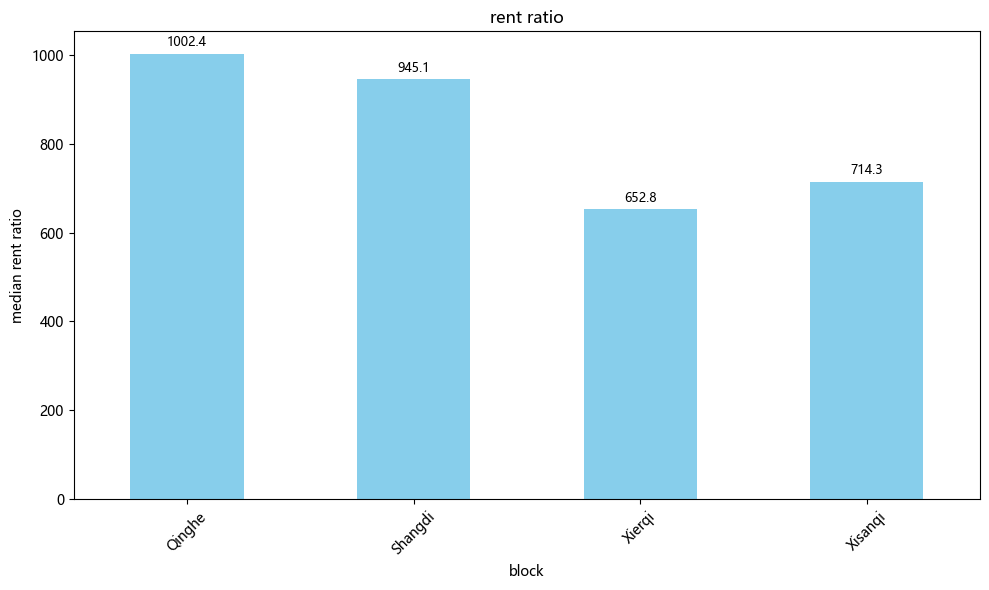

In [63]:
# 按街区分组，计算租售比的中位数
median_ratio = merged_df_with_dummies.groupby('location')['price_to_rent_ratio'].median()

# 绘制柱状图
plt.figure(figsize=(10, 6))
# 绘制柱状图，同时获取图表对象（用于后续标注）
ax = median_ratio.plot(kind='bar', color='skyblue')

# 为每个柱状图标注“租售比中位值”
for i, median_val in enumerate(median_ratio):
    # 在柱子顶部标注数值，ha='center' 表示水平居中，va='bottom' 表示垂直靠下
    # f'{median_val:.1f}' 表示保留1位小数（可根据需要调整精度）
    ax.text(
        i, 
        median_val + 10,    # 数值垂直位置（+10 是为了让标注在柱子上方，避免重叠）
        f'{median_val:.1f}',  
        ha='center', 
        va='bottom',
        fontsize=9
    )

# 设置图表标题、坐标轴标签
plt.title('rent ratio')
plt.xlabel('block')
plt.ylabel('median rent ratio')    # 单位为“月”，表示“租金覆盖房价所需的月数”
plt.xticks(rotation=45)
plt.tight_layout()    # 自动调整布局，避免标签截断
plt.show()

## Comments:

### 1. 三种方法的租售比对比

- 直接从原始数据取中位数：单纯计算观测值的中位数，完全没利用 “面积”“街区” 等特征间的关系，忽略了这些因素对房价 / 租金的联合影响。
-  基础线性回归：仅捕捉特征间的线性关系，忽略 “面积与街区的组合作用”（如不同街区中面积对房价的影响规律差异）
- 含交互项的非线性回归（增强模型）：纳入“面积 × 街区” 的交互作用 如面积在不同街区对房价的影响有差异），更贴合 “不同街区的地段、配套会让‘面积价值’有区别” 的逻辑。

### 2. 基于样本量该信任哪种方法？

- 若样本量足够大（能支撑复杂模型训练且不发生 “过拟合”），最该信任 “含交互项的非线性回归（增强模型）”。
- 原因：它考虑了“街区与面积的联合作用” 等更真实的特征关系，对房价、租金的预测更精准，由此计算的租售比也更能反映真实的 “房价 - 租金匹配规律”。
- 相比之下：“直接取原始中位数” 浪费了特征间的关联信息；“基础线性回归” 过于简单，没覆盖现实中存在交互效应。因此，只要样本量能支撑复杂模型，增强模型的结果最值得信任。